In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
import re

In [29]:
 train_df = pd.read_csv('/content/drive/MyDrive/toxic-comment/train.csv', index_col = 0)
 test_df = pd.read_csv('/content/drive/MyDrive/toxic-comment/test.csv', index_col = 0)

In [30]:
train_df.sample(5)

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
id,,,,,,,
884346a76a7f5330,"""\n\nCarbonated?\nDoogh is and is not carbonat...",0,0,0,0,0,0
930b0b86841b4d7f,"""\n\n To the tune of """"John Henry"""" \n\n The f...",0,0,0,0,0,0
cd69f2e4fab5c38f,"""\nSomething definitely needs to be done — the...",0,0,0,0,0,0
08f4270aad0adde8,UNBELIEVABLE you went ahead and removed the se...,1,0,0,0,0,0
89836be8b04db67d,I am a homo sexual. I am a homo sexual. I am...,1,0,0,0,0,0


In [31]:
cols_target = train_df.columns.tolist()[1:]

In [32]:
train_df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
# check null values
train_null_counts = train_df.isnull().sum().sum()
test_null_counts = test_df.isnull().sum().sum()
assert(train_null_counts == 0)
assert(test_null_counts == 0)

In [34]:
test_df.head()

,comment_text
id,
00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
0000247867823ef7,== From RfC == \n\n The title is fine as it is...
00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
00017563c3f7919a,":If you have a look back at the source, the in..."
00017695ad8997eb,I don't anonymously edit articles at all.


In [35]:
print(f'Total rows in train is {len(train_df)}')
print(f'Total rows in test is {len(test_df)}')
print(train_df[cols_target].sum())


Total rows in train is 159571
Total rows in test is 153164
toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64


In [36]:
train_df['comment_length'] = train_df['comment_text'].map(lambda x: len(str(x)))

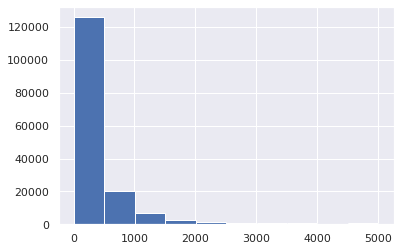

In [37]:
sns.set()
train_df['comment_length'].hist()
plt.show()

In [38]:
test_df['comment_length'] = test_df['comment_text'].apply(lambda x: len(str(x)))

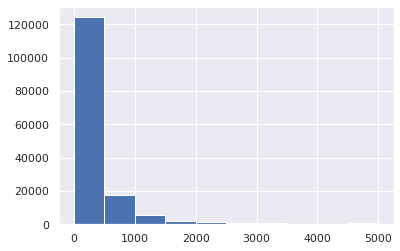

In [39]:
sns.set()
test_df['comment_length'].hist()
plt.show()

In [40]:
labels = train_df[cols_target]

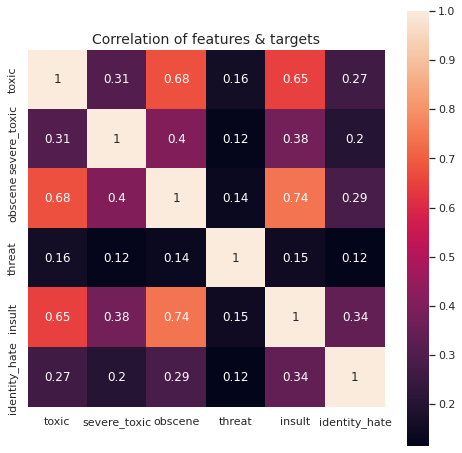

In [41]:
plt.figure(figsize=(8,8))
plt.title('Correlation of features & targets', size=14)
sns.heatmap(labels.astype(float).corr(), square=True, annot=True) 

In [42]:
def clean_text(text):
  text = text.lower()
  text = re.sub(r"what's", "what is ", text)
  text = re.sub(r"\'s", " ", text)
  text = re.sub(r"\'ve", " have ", text)
  text = re.sub(r"can't", "cannot ", text)
  text = re.sub(r"n't", " not ", text)
  text = re.sub(r"i'm", "i am ", text)
  text = re.sub(r"\'re", " are ", text)
  text = re.sub(r"\'d", " would ", text)
  text = re.sub(r"\'ll", " will ", text)
  text = re.sub(r"\'scuse", " excuse ", text)
  text = re.sub('\W', ' ', text)
  text = re.sub('\s+', ' ', text)
  text = text.strip(' ')
  return text


In [43]:
train_df['comment_text'] = train_df['comment_text'].map(lambda x: clean_text(x))

In [44]:
test_df['comment_text'] = test_df['comment_text'].map(lambda x: clean_text(x))

In [45]:
train_df = train_df.drop('comment_length', axis=1)

In [46]:
train_X = train_df['comment_text']
train_Y = train_df[cols_target]
test_X = test_df['comment_text']

In [47]:
print(train_X.shape, test_X.shape)

(159571,) (153164,)


In [48]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(max_features=5000, stop_words='english')
vect

TfidfVectorizer(max_features=5000, stop_words='english')

In [49]:
train_X_em = vect.fit_transform(train_X)
train_X_em

<159571x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 3178792 stored elements in Compressed Sparse Row format>

In [50]:
test_X_em = vect.fit_transform(test_X)
test_X_em

<153164x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 2624463 stored elements in Compressed Sparse Row format>

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()

submission_binary = pd.read_csv('/content/drive/MyDrive/toxic-comment/sample_submission.csv')

for label in cols_target:
  print(f'Processing {label}')
  y = train_df[label]
  logreg.fit(train_X_em, y)

  y_pred = logreg.predict(train_X_em)
  print(f'Training Accuracy is {accuracy_score(y, y_pred)}')
  test_y_prob = logreg.predict_proba(test_X_em)[:, 1]
  submission_binary[label] = test_y_prob


Processing toxic


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy is 0.9597169911826083
Processing severe_toxic
Training Accuracy is 0.9910134046913286
Processing obscene
Training Accuracy is 0.9798584955913042
Processing threat
Training Accuracy is 0.9972739407536457
Processing insult


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy is 0.9728146091708393
Processing identity_hate
Training Accuracy is 0.9925926390133546


In [52]:
submission_binary.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.025087,0.004348,0.015025,0.002080,0.013054,0.003425
1,0000247867823ef7,0.025778,0.006463,0.010226,0.001719,0.014174,0.004739
2,00013b17ad220c46,0.059542,0.004954,0.017189,0.001953,0.016152,0.005013
3,00017563c3f7919a,0.059983,0.003677,0.021462,0.001883,0.019730,0.004118
4,00017695ad8997eb,0.152380,0.005603,0.033721,0.002515,0.038920,0.006407


In [53]:
submission_binary.to_csv('submission_binary.csv',index=False)